In [42]:
from pymongo import MongoClient
import random
import string
import psutil
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import mannwhitneyu
import memory_profiler
#brew services start mongodb-community@6.0


In [43]:
# Connect to MongoDB (default host and port: localhost:27017)
client = MongoClient('mongodb://localhost:27017/')
# Create or access the 'user_info_db' database
db = client['user_info_db']

In [44]:
collection_50 = db['user_info_50']
collection_500 = db['user_info_500']
collection_5000 = db['user_info_5000']

sorting_search_50 = db['sorting_search_50']
sorting_search_500 = db['sorting_search_500']
sorting_search_5000 = db['sorting_search_5000']

In [45]:
def generate_random_name(length=6):
    """Generate a random name of a specified length"""
    return ''.join(random.choices(string.ascii_uppercase, k=length))

In [54]:
# Insertion function for 'user_info_50'
def insert_user_info_50():
    collection_50.delete_many({})  # Clear any existing data
    names_50 = [{"name": generate_random_name()} for _ in range(50)]
    collection_50.insert_many(names_50)
    print("Inserted 50 names into user_info_50.")

# Insertion function for 'user_info_500'
def insert_user_info_500():
    collection_500.delete_many({})  # Clear any existing data
    names_500 = [{"name": generate_random_name()} for _ in range(500)]
    collection_500.insert_many(names_500)
    print("Inserted 500 names into user_info_500.")

# Insertion function for 'user_info_5000'
def insert_user_info_5000():
    collection_5000.delete_many({})  # Clear any existing data
    names_5000 = [{"name": generate_random_name()} for _ in range(5000)]
    collection_5000.insert_many(names_5000)
    print("Inserted 5000 names into user_info_5000.")

# inserting
insert_user_info_50()
insert_user_info_500()
insert_user_info_5000()


Inserted 50 names into user_info_50.
Inserted 500 names into user_info_500.
Inserted 5000 names into user_info_5000.


In [55]:
# Step 2: Create the target name lists
# Helper function to create target lists (existing + non-existing names)
def create_target_name_list(collection_name, total_names):
    collection = db[collection_name]
    existing_names = [user["name"] for user in collection.find()]
    print(f"Existing names in {collection_name}: {existing_names[:10]}")  # Displaying first 10 names for inspection
    
    # Generate non-existing names
    new_non_existing_names = set()
    while len(new_non_existing_names) < total_names // 2:  # Half will be non-existing
        new_name = generate_random_name()
        if new_name not in existing_names:
            new_non_existing_names.add(new_name)
    
    target_name_list = existing_names[:total_names // 2] + list(new_non_existing_names)
    random.shuffle(target_name_list)  # Shuffle the list to mix existing and new names
    return target_name_list

# Creating target name lists
target_name_list_50 = create_target_name_list('user_info_50', 100)
target_name_list_500 = create_target_name_list('user_info_500', 1000)
target_name_list_5000 = create_target_name_list('user_info_5000', 10000)

# Verifying the lists
print(f"Target name list for user_info_50 (100 names): {target_name_list_50[:10]}...")  # Displaying first 10 names for inspection
print(f"Target name list for user_info_500 (1000 names): {target_name_list_500[:10]}...")
print(f"Target name list for user_info_5000 (10000 names): {target_name_list_5000[:10]}...")

Existing names in user_info_50: ['RVZGAY', 'HKGBPY', 'SOGMGB', 'CGDKVZ', 'TMLZMH', 'XFCUXA', 'UXLEAA', 'PZOMQS', 'VJWPRX', 'BTNEBV']
Existing names in user_info_500: ['ZAIQJM', 'UUSVAL', 'SEOZZM', 'KZHSJF', 'BWCVQJ', 'JMSRAP', 'PUOULA', 'PXHOTH', 'YHTCCK', 'RZJNUM']
Existing names in user_info_5000: ['EOIAFN', 'TFVCJO', 'TFHOVD', 'FXXKBQ', 'PTISBR', 'UDYDOD', 'CJWDRQ', 'DWZNNI', 'XPFLIV', 'THIRZO']
Target name list for user_info_50 (100 names): ['FRTKZH', 'IGORPK', 'QTBHEM', 'TOCTOU', 'UROYGF', 'JVGGQF', 'BJIUKN', 'DUNQBB', 'YUPDHU', 'LDSVKR']...
Target name list for user_info_500 (1000 names): ['GNHHBK', 'WMGJAH', 'DZXTQM', 'IDBEWL', 'IFVVJW', 'OTUBQA', 'LFLLLL', 'FXNFBE', 'ZITGTN', 'VAHITB']...
Target name list for user_info_5000 (10000 names): ['GWNNBH', 'XRATBD', 'GFYXUU', 'XXMIWS', 'ANKTDG', 'WMSXRH', 'FLJATN', 'LXHHLP', 'UYOSOE', 'NPGVTS']...


# Sorting the array first


In [57]:
# Sort and store data in new collections
def sort_and_store(collection, new_collection_name):
    db[new_collection_name].delete_many({})  # Clear any existing data
    sorted_data = collection.find().sort('name')  # Replace 'your_field_name' with the field you want to sort by
    sorted_list = list(sorted_data)
    
    # Create a new collection and insert the sorted data
    db[new_collection_name].insert_many(sorted_list)

# Sort the collections and store them in new collections
sort_and_store(collection_50, 'sorted_collection_50')
sort_and_store(collection_500, 'sorted_collection_500')
sort_and_store(collection_5000, 'sorted_collection_5000')

print("Collections have been sorted and stored.")

Collections have been sorted and stored.


In [58]:
# Binary search implementation for sorted collections
def binary_search(sorted_collection, target_name):
    left, right = 0, len(sorted_collection) - 1
    
    while left <= right:
        mid = (left + right) // 2
        mid_name = sorted_collection[mid]["name"]
        
        if mid_name == target_name:
            return True  # Found the name
        elif mid_name < target_name:
            left = mid + 1  # Search in the right half
        else:
            right = mid - 1  # Search in the left half
            
    return False  # Name not found

# Function to check if target names exist in the sorted collection
def check_names_in_sorted_collection(sorted_collection_name, target_name_list):
    sorted_collection = db[sorted_collection_name].find()  # Retrieve the sorted collection
    sorted_data = list(sorted_collection)  # Convert the cursor to a list
    
    # Check if each target name exists in the sorted collection using binary search
    results = {}
    for target_name in target_name_list:
        results[target_name] = binary_search(sorted_data, target_name)
    
    return results

# Check for names in the sorted collections
results_50 = check_names_in_sorted_collection('sorted_collection_50', target_name_list_50)
results_500 = check_names_in_sorted_collection('sorted_collection_500', target_name_list_500)
results_5000 = check_names_in_sorted_collection('sorted_collection_5000', target_name_list_5000)

# Displaying results (for example, first 10 names and their existence status)
print("Results for sorted_collection_50 (first 10 names):")
for name in target_name_list_50[:10]:
    print(f"{name}: {'Exists' if results_50.get(name) else 'Does not exist'}")

print("Results for sorted_collection_500 (first 10 names):")
for name in target_name_list_500[:10]:
    print(f"{name}: {'Exists' if results_500.get(name) else 'Does not exist'}")

print("Results for sorted_collection_5000 (first 10 names):")
for name in target_name_list_5000[:10]:
    print(f"{name}: {'Exists' if results_5000.get(name) else 'Does not exist'}")



Results for sorted_collection_50 (first 10 names):
FRTKZH: Exists
IGORPK: Exists
QTBHEM: Does not exist
TOCTOU: Exists
UROYGF: Does not exist
JVGGQF: Exists
BJIUKN: Does not exist
DUNQBB: Does not exist
YUPDHU: Exists
LDSVKR: Does not exist
Results for sorted_collection_500 (first 10 names):
GNHHBK: Exists
WMGJAH: Exists
DZXTQM: Does not exist
IDBEWL: Does not exist
IFVVJW: Exists
OTUBQA: Does not exist
LFLLLL: Exists
FXNFBE: Exists
ZITGTN: Exists
VAHITB: Does not exist
Results for sorted_collection_5000 (first 10 names):
GWNNBH: Exists
XRATBD: Does not exist
GFYXUU: Does not exist
XXMIWS: Exists
ANKTDG: Exists
WMSXRH: Does not exist
FLJATN: Does not exist
LXHHLP: Exists
UYOSOE: Does not exist
NPGVTS: Exists


# Binary search

/Users/rassesaccount/Documents/code/QuantumResearch/Quantum/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rassesaccount/Documents/code/QuantumResearch/Quantum/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


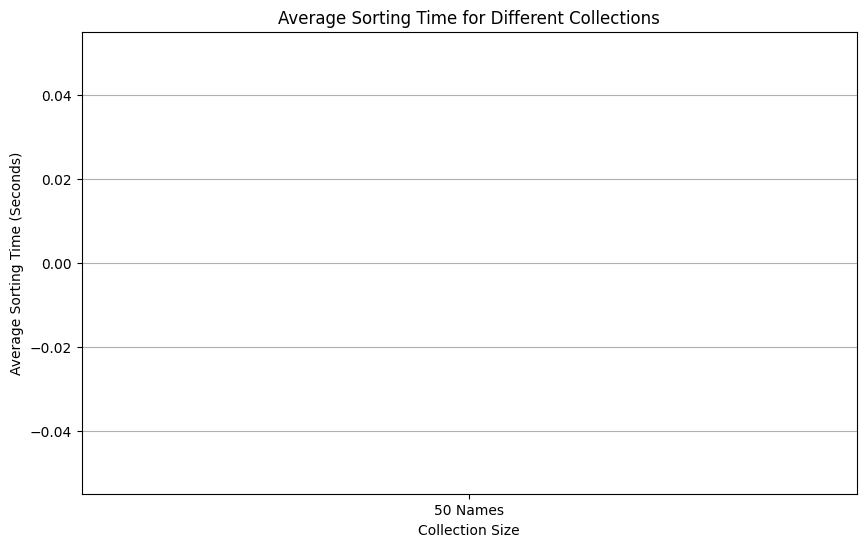

/var/folders/lh/mpgfvfxd0rq9sws9v6nscf7m0000gn/T/ipykernel_77527/2004390566.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([metrics_50[metric_name], metrics_500[metric_name], metrics_5000[metric_name]],


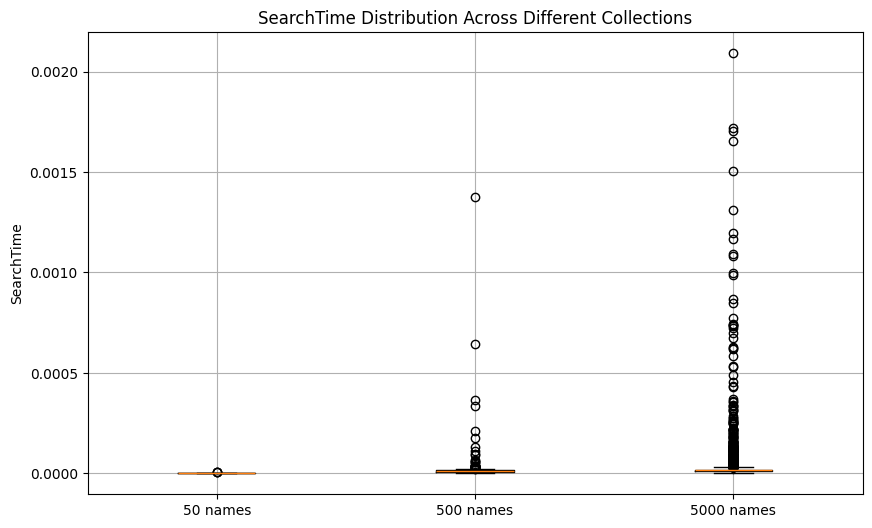

/var/folders/lh/mpgfvfxd0rq9sws9v6nscf7m0000gn/T/ipykernel_77527/2004390566.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([metrics_50[metric_name], metrics_500[metric_name], metrics_5000[metric_name]],


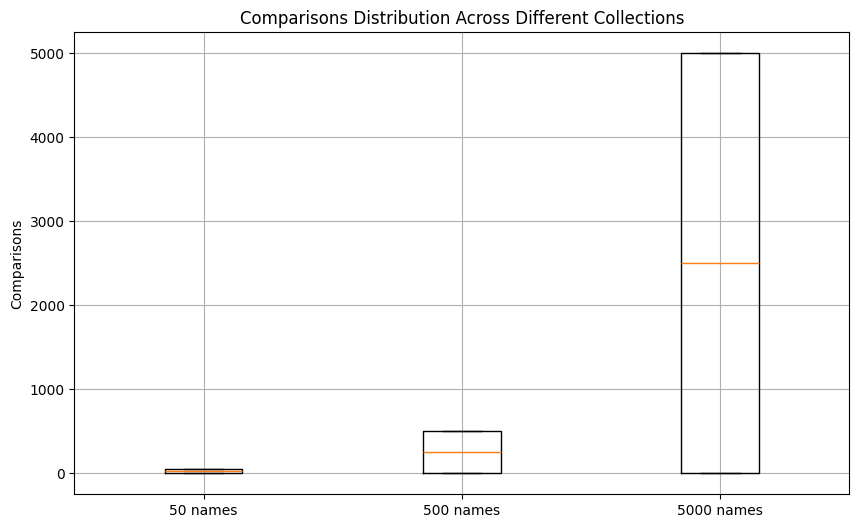

/var/folders/lh/mpgfvfxd0rq9sws9v6nscf7m0000gn/T/ipykernel_77527/2004390566.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([metrics_50[metric_name], metrics_500[metric_name], metrics_5000[metric_name]],


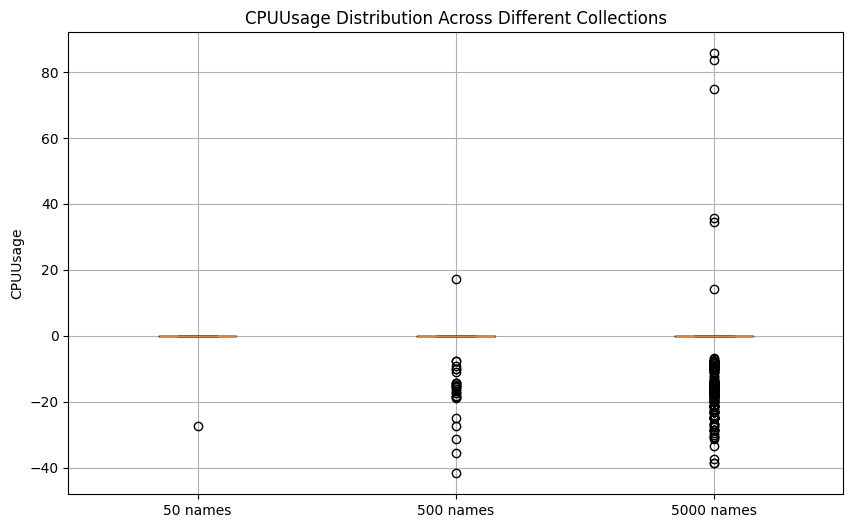

/var/folders/lh/mpgfvfxd0rq9sws9v6nscf7m0000gn/T/ipykernel_77527/2004390566.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([metrics_50[metric_name], metrics_500[metric_name], metrics_5000[metric_name]],


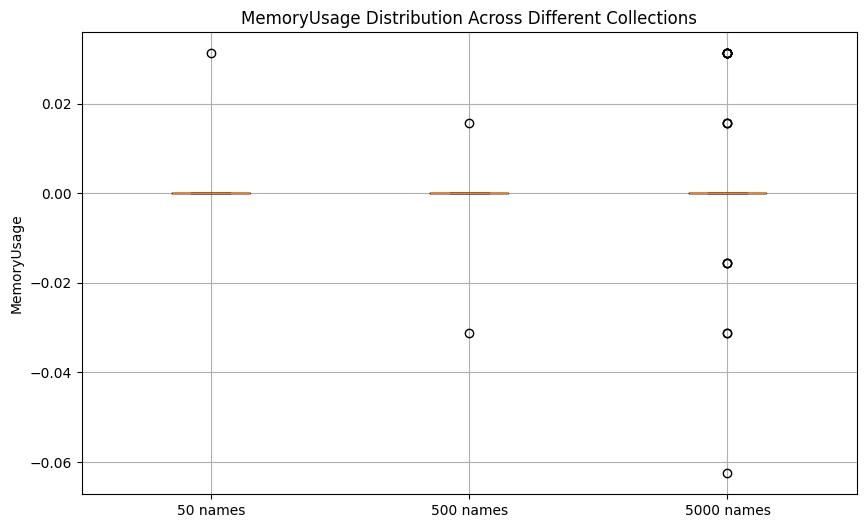

In [31]:
# Function to fetch data from a collection
def fetch_data_from_collection(collection_name):
    collection = db[collection_name]
    return list(collection.find())

# Function to extract sorting time from binarysorting collections
def extract_sorting_times(data):
    return [entry['SortingTime'] for entry in data]

# Function to extract the relevant metrics from the sorting_search_xxxx collections
def prepare_metrics_for_boxplot(data):
    df = pd.DataFrame(data)
    metrics = {
        'SearchTime': df['SearchTime'],
        'Comparisons': df['Comparisons'],
        'CPUUsage': df['CPUUsage'],
        'MemoryUsage': df['MemoryUsage']
    }
    return metrics

# Fetch data from binarysorting collections for sorting times
quicksort_50_data = fetch_data_from_collection('quicksort_50')
quicksort_500_data = fetch_data_from_collection('quicksort_500')
quicksort_5000_data = fetch_data_from_collection('quicksort_5000')

# Extract sorting times for each collection
sorting_times_50 = extract_sorting_times(quicksort_50_data)
sorting_times_500 = extract_sorting_times(quicksort_500_data)
sorting_times_5000 = extract_sorting_times(quicksort_5000_data)

# Fetch data from sorting_search collections for various metrics
sorting_search_50_data = fetch_data_from_collection('sorting_search_50')
sorting_search_500_data = fetch_data_from_collection('sorting_search_500')
sorting_search_5000_data = fetch_data_from_collection('sorting_search_5000')

# Prepare metrics for sorting_search collections (SearchTime, Comparisons, CPUUsage, MemoryUsage)
sorting_search_50_metrics = prepare_metrics_for_boxplot(sorting_search_50_data)
sorting_search_500_metrics = prepare_metrics_for_boxplot(sorting_search_500_data)
sorting_search_5000_metrics = prepare_metrics_for_boxplot(sorting_search_5000_data)

# Plotting the Bar Graph for Sorting Times
def plot_sorting_time_bar_graph(sorting_times_50, sorting_times_500, sorting_times_5000):
    plt.figure(figsize=(10, 6))
    avg_sort_time_50 = np.mean(sorting_times_50)
    avg_sort_time_500 = np.mean(sorting_times_500)
    avg_sort_time_5000 = np.mean(sorting_times_5000)

    collections = ['50 Names', '500 Names', '5000 Names']
    avg_sort_times = [avg_sort_time_50, avg_sort_time_500, avg_sort_time_5000]

    plt.bar(collections, avg_sort_times, color=['blue', 'green', 'red'])
    plt.xlabel('Collection Size')
    plt.ylabel('Average Sorting Time (Seconds)')
    plt.title('Average Sorting Time for Different Collections')
    plt.grid(True, axis='y')
    plt.show()

# Plotting Box Plots for Various Metrics
def plot_boxplot_for_metrics(metrics_50, metrics_500, metrics_5000, metric_name):
    plt.figure(figsize=(10, 6))
    plt.boxplot([metrics_50[metric_name], metrics_500[metric_name], metrics_5000[metric_name]],
                labels=['50 names', '500 names', '5000 names'])
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} Distribution Across Different Collections')
    plt.grid(True)
    plt.show()

# Plot all the required box plots
def plot_all_boxplots():
    plot_boxplot_for_metrics(sorting_search_50_metrics, sorting_search_500_metrics, sorting_search_5000_metrics, 'SearchTime')
    plot_boxplot_for_metrics(sorting_search_50_metrics, sorting_search_500_metrics, sorting_search_5000_metrics, 'Comparisons')
    plot_boxplot_for_metrics(sorting_search_50_metrics, sorting_search_500_metrics, sorting_search_5000_metrics, 'CPUUsage')
    plot_boxplot_for_metrics(sorting_search_50_metrics, sorting_search_500_metrics, sorting_search_5000_metrics, 'MemoryUsage')

# Run the plotting functions
plot_sorting_time_bar_graph(sorting_times_50, sorting_times_500, sorting_times_5000)
plot_all_boxplots()


In [36]:
import numpy as np

# Helper function to calculate statistical measures with empty check
def calculate_statistics(data):
    if len(data) == 0:
        return {
            'Mean': None,
            'StdDev': None,
            'Median': None,
            'Min': None,
            'Max': None
        }
    stats = {
        'Mean': np.mean(data),
        'StdDev': np.std(data),
        'Median': np.median(data),
        'Min': np.min(data),
        'Max': np.max(data)
    }
    return stats

def fetch_data_from_collection(collection_name):
    collection = db[collection_name]
    data = list(collection.find())
    if not data:
        print(f"Warning: No data found in collection {collection_name}")
    return data

# Inspect the first few entries of the fetched data
print(quicksort_50_data[:5])  # Show first 5 entries


import numpy as np

# Modified function with empty check
def calculate_statistics(data):
    if len(data) == 0:
        return {
            'Mean': None,
            'StdDev': None,
            'Median': None,
            'Min': None,
            'Max': None
        }
    stats = {
        'Mean': np.mean(data),
        'StdDev': np.std(data),
        'Median': np.median(data),
        'Min': np.min(data),
        'Max': np.max(data)
    }
    return stats

# Ensure the data is fetched properly
quicksort_50_data = fetch_data_from_collection('quicksort_50')
quicksort_500_data = fetch_data_from_collection('quicksort_500')
quicksort_5000_data = fetch_data_from_collection('quicksort_5000')

# Check the size of the data
print(f"Number of records in 'quicksort_50': {len(quicksort_50_data)}")
print(f"Number of records in 'quicksort_500': {len(quicksort_500_data)}")
print(f"Number of records in 'quicksort_5000': {len(quicksort_5000_data)}")

# Extract sorting times and calculate statistics
sorting_times_50 = extract_sorting_times(quicksort_50_data)
sorting_times_500 = extract_sorting_times(quicksort_500_data)
sorting_times_5000 = extract_sorting_times(quicksort_5000_data)

# Print sample of data to debug
print(sorting_times_50[:5])  # Check the first 5 sorting times

# Prepare statistics
sorting_time_stats_50 = calculate_statistics(sorting_times_50)
sorting_time_stats_500 = calculate_statistics(sorting_times_500)
sorting_time_stats_5000 = calculate_statistics(sorting_times_5000)

# Print statistics
print("### Sorting Time Statistics ###")
print(f"50 Names: {sorting_time_stats_50}")
print(f"500 Names: {sorting_time_stats_500}")
print(f"5000 Names: {sorting_time_stats_5000}")


[]
Number of records in 'quicksort_50': 0
Number of records in 'quicksort_500': 0
Number of records in 'quicksort_5000': 0
[]
### Sorting Time Statistics ###
50 Names: {'Mean': None, 'StdDev': None, 'Median': None, 'Min': None, 'Max': None}
500 Names: {'Mean': None, 'StdDev': None, 'Median': None, 'Min': None, 'Max': None}
5000 Names: {'Mean': None, 'StdDev': None, 'Median': None, 'Min': None, 'Max': None}
